Make figures of model validation of escript for heat conduction and heat advection by comparing to analytical solutions


In [1]:
import numpy as np
import matplotlib.pyplot as pl

In [2]:
import esys.escript as es

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:262: DeprecationWarning: Interpreting naive datetime as local 2018-10-29 16:04:40.214595. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


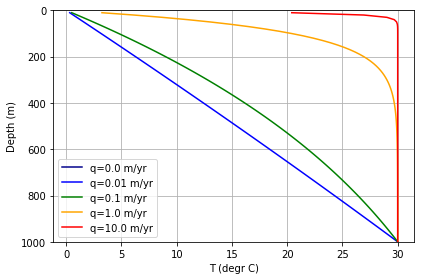

In [2]:
# make grid of k and thickness
zs = np.linspace(10, 1000, 100)
T0 = 0.0
T1 = 30.0
L = 1000.0
rho = 1000.0
c = 900.0
K = 2.5

qs = [0.0, 0.01, 0.1, 1.0, 10.0]
cs = ['darkblue', 'blue', 'green', 'orange', 'red']

c = 900.0

######
fig, ax = pl.subplots(1, 1)

for q, cl in zip(qs, cs):
    q_ms = q / (365.25 * 24 * 60 * 60.0)
    beta = -c * rho * q_ms * L / K
    Tr = (np.exp((beta * zs) / L) - 1.0) / (np.exp(beta) - 1.0)
    T = Tr * (T1 - T0) + T0
    label = 'q=' + str(q) + ' m/yr'
    ax.plot(T, zs, color=cl, label=label)

ax.legend(loc='lower left')
ax.set_xlabel('T (degr C)')
ax.set_ylabel('Depth (m)')
ax.set_ylim(L, 0)

ax.grid()

fig.tight_layout()

fig.savefig('fig/heat_advection_example.png',
            dpi=200)
